In [137]:
!pip install  sompy

In [139]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import ceil
import warnings
import feature_engine.missing_data_imputers as mdi
import category_encoders as ce
warnings.filterwarnings("ignore")
import matplotlib.gridspec as gspec
from pandas_profiling import ProfileReport
import pandas_profiling as pp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling as pp
import os
from pathlib import Path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from pandas_profiling import ProfileReport
from os.path import join
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

import graphviz

In [341]:
df = pd.read_excel('WonderfulWinesoftheWorld.xlsx')

In [342]:
df

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
0,5325,653,55,20,78473,0,0,20,18,826,...,5,0,0,0,0,0,0,0,0,0
1,3956,1041,75,18,105087,0,0,36,33,1852,...,4,0,0,0,1,0,0,0,0,0
2,3681,666,18,12,27984,1,0,4,56,39,...,8,0,0,0,0,0,0,0,0,0
3,2829,1049,42,16,61748,1,1,2,46,37,...,7,0,0,0,0,0,0,0,1,1
4,8788,837,47,16,65789,0,1,2,3,36,...,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1383,1132,57,20,81033,0,1,19,59,776,...,4,1,0,0,0,0,1,0,1,0
9996,4070,596,66,15,84714,0,0,18,45,720,...,2,0,0,0,0,0,0,0,0,0
9997,7909,619,18,12,40466,0,0,3,65,47,...,5,0,0,0,0,0,0,0,0,0
9998,4158,1107,33,16,53661,1,0,1,368,15,...,6,0,0,0,0,0,0,0,0,0


In [343]:
df.set_index('Custid', inplace= True)

In [344]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Dayswus,10000.0,898.1020,202.492789,550.0,723.75,894.0,1074.00,1250.0
Age,10000.0,47.9273,17.302721,18.0,33.00,48.0,63.00,78.0
Edu,10000.0,16.7391,1.876375,12.0,15.00,17.0,18.00,20.0
Income,10000.0,69904.3580,27612.233311,10000.0,47642.00,70012.0,92147.00,140628.0
Kidhome,10000.0,0.4188,0.493387,0.0,0.00,0.0,1.00,1.0
Teenhome,10000.0,0.4698,0.499112,0.0,0.00,0.0,1.00,1.0
Freq,10000.0,14.6281,11.969073,1.0,4.00,12.0,24.00,56.0
Recency,10000.0,62.4068,69.874255,0.0,26.00,52.0,78.25,549.0
Monetary,10000.0,622.5552,647.135323,6.0,63.00,383.0,1077.00,3052.0
LTV,10000.0,209.0712,291.986040,-178.0,-2.00,57.0,364.00,1791.0


In [345]:
df.shape

(10000, 28)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5325 to 4914
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Dayswus      10000 non-null  int64
 1   Age          10000 non-null  int64
 2   Edu          10000 non-null  int64
 3   Income       10000 non-null  int64
 4   Kidhome      10000 non-null  int64
 5   Teenhome     10000 non-null  int64
 6   Freq         10000 non-null  int64
 7   Recency      10000 non-null  int64
 8   Monetary     10000 non-null  int64
 9   LTV          10000 non-null  int64
 10  Perdeal      10000 non-null  int64
 11  Dryred       10000 non-null  int64
 12  Sweetred     10000 non-null  int64
 13  Drywh        10000 non-null  int64
 14  Sweetwh      10000 non-null  int64
 15  Dessert      10000 non-null  int64
 16  Exotic       10000 non-null  int64
 17  WebPurchase  10000 non-null  int64
 18  WebVisit     10000 non-null  int64
 19  SMRack       10000 non-null  int64
 20  LGRa

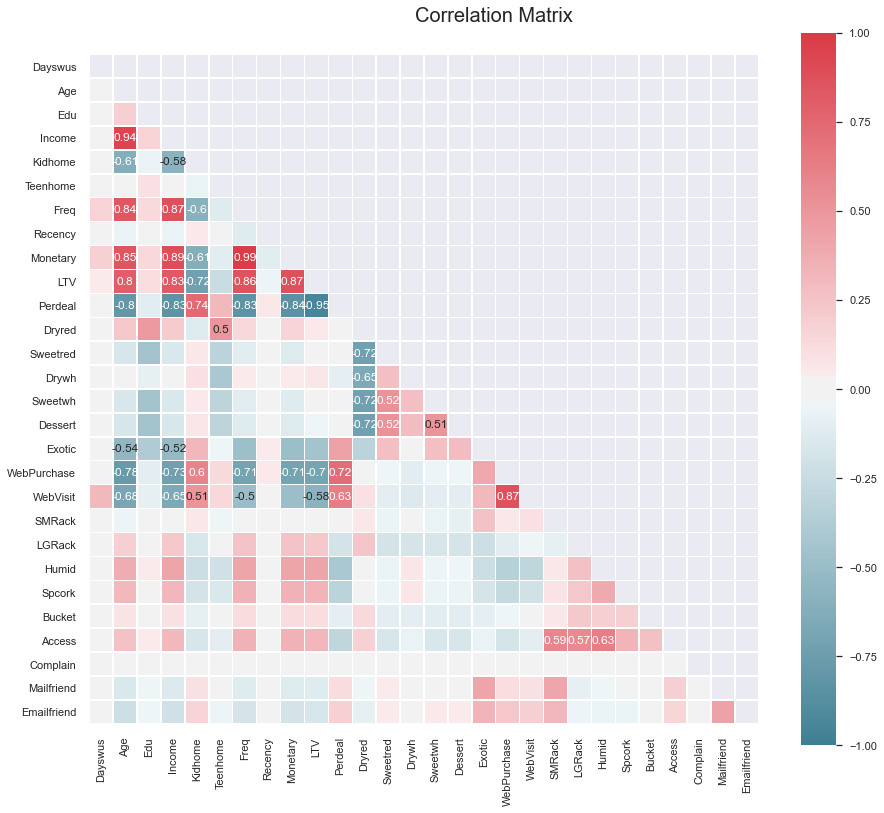

In [313]:

fig = plt.figure(figsize=(15, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(df.corr(method="spearman"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True #The upper-triangle array is now composed by True values

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr,mask = mask, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.show()

In [80]:
def outlierscheck(df):
    for row in df.columns:
        df[row].plot(kind='box')
        plt.show()

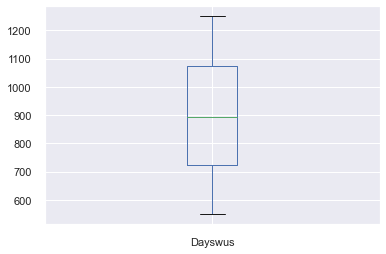

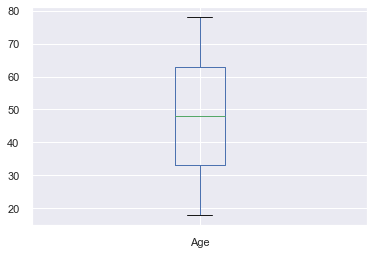

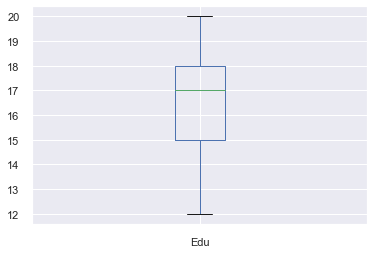

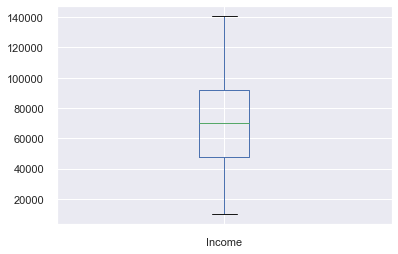

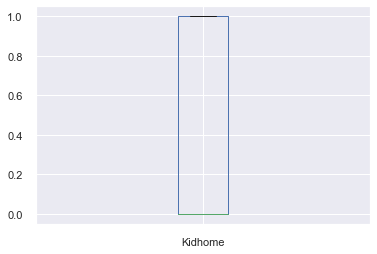

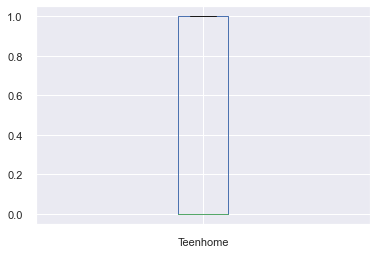

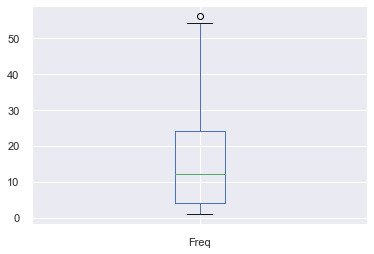

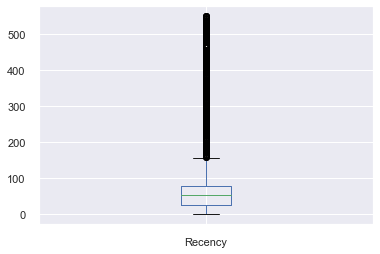

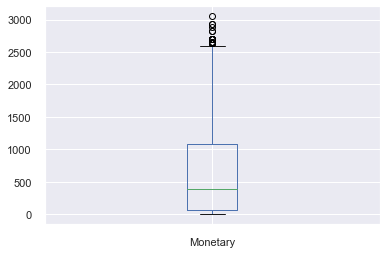

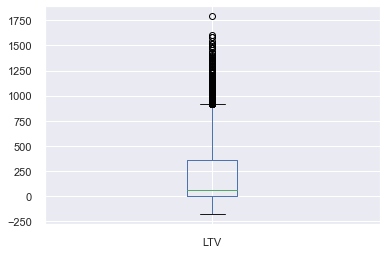

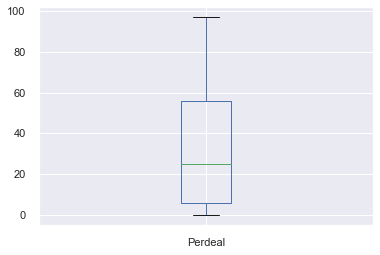

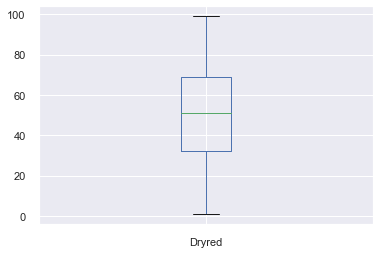

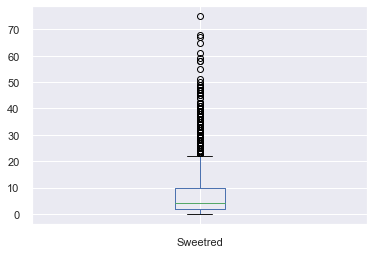

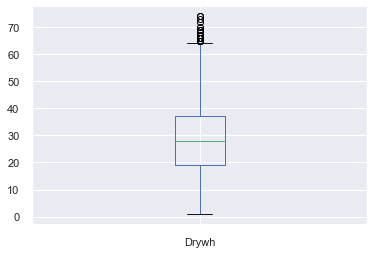

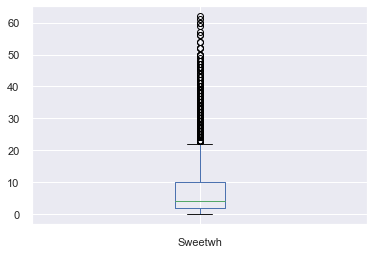

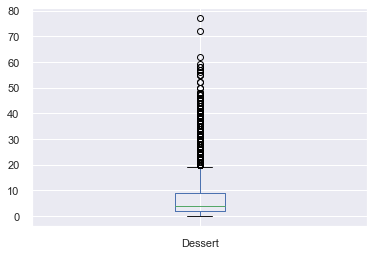

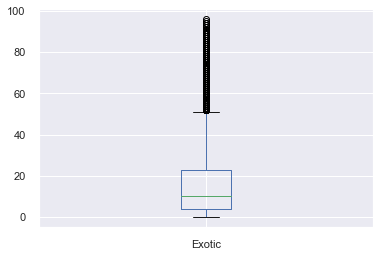

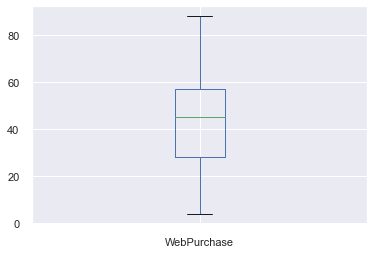

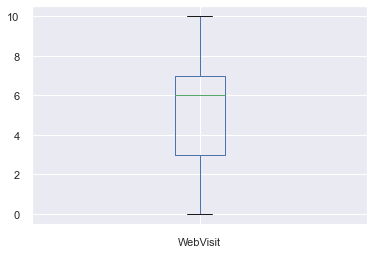

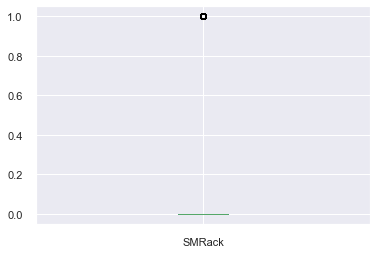

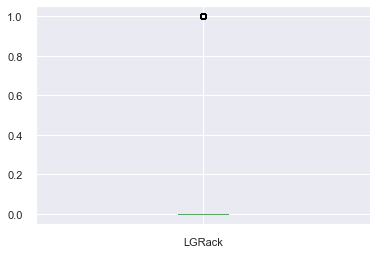

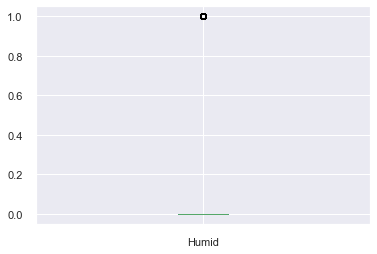

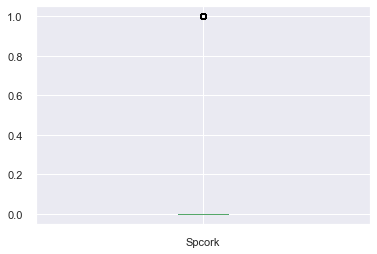

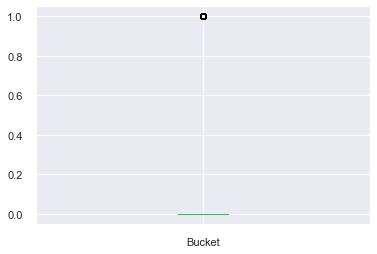

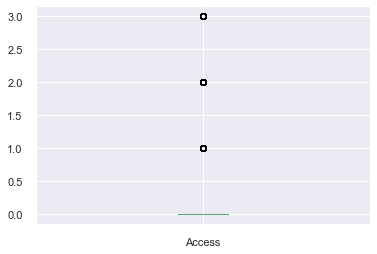

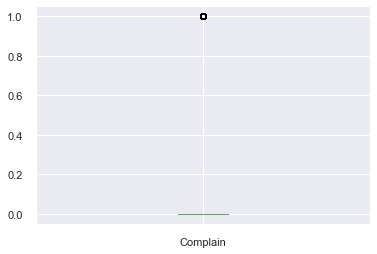

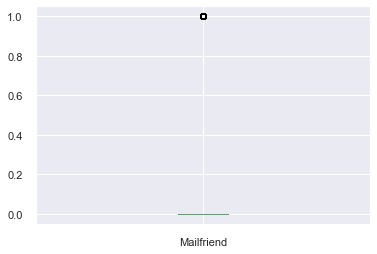

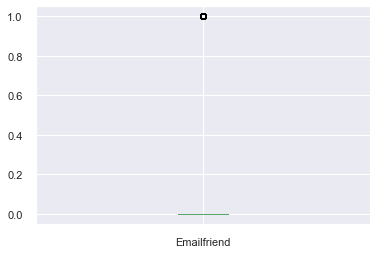

In [347]:
 outlierscheck(df)

In [82]:
data.isna().sum()

Dayswus        0
Age            0
Edu            0
Income         0
Kidhome        0
Teenhome       0
Freq           0
Recency        0
Monetary       0
LTV            0
Perdeal        0
Dryred         0
Sweetred       0
Drywh          0
Sweetwh        0
Dessert        0
Exotic         0
WebPurchase    0
WebVisit       0
SMRack         0
LGRack         0
Humid          0
Spcork         0
Bucket         0
Access         0
Complain       0
Mailfriend     0
Emailfriend    0
dtype: int64

## Normalization

In [314]:
def Scaler(data, scaler):
    scaler = scaler
    data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
    return round(data_scaled, 4)

df = Scaler(df, MinMaxScaler())


In [315]:
df

,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
Custid,,,,,,,,,,,,,,,,,,,,,
5325,0.1471,0.6167,1.000,0.5242,0.0,0.0,0.3455,0.0328,0.2692,0.3164,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3956,0.7014,0.9500,0.750,0.7279,0.0,0.0,0.6364,0.0601,0.6060,0.3641,...,0.4,0.0,0.0,0.0,1.0,0.0,0.0000,0.0,0.0,0.0
3681,0.1657,0.0000,0.000,0.1377,1.0,0.0,0.0545,0.1020,0.0108,0.0868,...,0.8,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
2829,0.7129,0.4000,0.500,0.3961,1.0,1.0,0.0182,0.0838,0.0102,0.0874,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,1.0,1.0
8788,0.4100,0.4833,0.500,0.4271,0.0,1.0,0.0182,0.0055,0.0098,0.0924,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,0.8314,0.6500,1.000,0.5438,0.0,1.0,0.3273,0.1075,0.2528,0.1854,...,0.4,1.0,0.0,0.0,0.0,0.0,0.3333,0.0,1.0,0.0
4070,0.0657,0.8000,0.375,0.5720,0.0,0.0,0.3091,0.0820,0.2344,0.2890,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
7909,0.0986,0.0000,0.000,0.2332,0.0,0.0,0.0364,0.1184,0.0135,0.0929,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Clusters

In [316]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):

    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [317]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  

def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

## K-means

In [318]:
def drop_lowvar(df,columns):
    for col in columns:
        if (df[col].var())< 0.01:
            df.drop(col,axis=1,inplace=True)
            columns.remove(col)

In [319]:
drop_lowvar(df,df.columns)

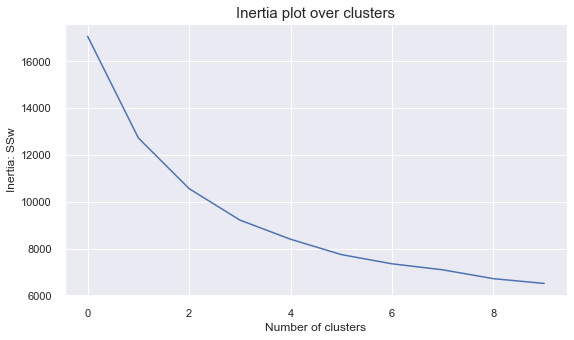

In [206]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(df)
    inertia.append(kmclust.inertia_)  
    
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [207]:
number_clusters = 2
km2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=1)
km2_labels = km2.fit_predict(df)
km2_labels

array([1, 1, 0, ..., 0, 0, 1])

In [208]:
labels= pd.Series(km2_labels, name='labels')
labels

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: labels, Length: 10000, dtype: int32

In [209]:
df.reset_index(inplace=True)
df_concat = pd.concat((df, labels), axis=1)
df_concat.groupby('labels').mean()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
labels,,,,,,,,,,,,,,,,,,,,,
0,5981.888889,0.500520,0.255011,0.550851,0.289552,0.908378,0.415547,0.082987,0.136431,0.048612,...,0.666689,0.099014,0.012993,0.000224,0.004256,0.001344,0.037855,0.012545,0.145161,0.101030
1,6015.507225,0.494682,0.695360,0.625881,0.594891,0.024025,0.513548,0.380668,0.095324,0.326437,...,0.404715,0.067738,0.115246,0.147399,0.119762,0.022399,0.117590,0.010116,0.067016,0.010838


In [237]:
df_concat.set_index('Custid',inplace=True)

KeyError: "None of ['Custid'] are in the columns"

# Hierarchical Clustering

In [160]:
d_cluster= df.copy()
d_clusterhc= df.copy()

In [161]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
hc_labels = hclust.fit_predict(d_clusterhc)

In [162]:
df_hc = pd.concat((df, pd.Series(hc_labels, name='labels')), axis=1)
df_hc.groupby('labels').mean()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
labels,,,,,,,,,,,,,,,,,,,,,
0,7763,0.497131,0.498973,0.593649,0.458991,0.418224,0.472124,0.247666,0.113031,0.202279,...,0.521189,0.083243,0.066564,0.077838,0.065946,0.014517,0.080717,0.012510,0.103166,0.053127
1,2763,0.497578,0.498449,0.590071,0.457847,0.419858,0.465532,0.248000,0.114855,0.202667,...,0.522525,0.078865,0.075177,0.088794,0.072340,0.010213,0.084346,0.008794,0.099574,0.047376


In [163]:
# SST
X = d_clusterhc.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [164]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  
    
    sst = get_ss(df)  
    
    r2 = []  
    
    for i in range(min_nclus, max_nclus+1):  
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) 
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        ssb = sst - np.sum(ssw_labels)  
        r2.append(ssb / sst)  
        
    return np.array(r2)

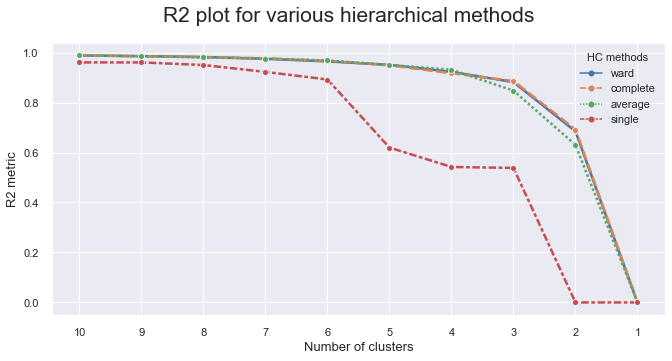

In [165]:
hc_methods = ["ward", "complete", "average", "single"]

max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=d_clusterhc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [166]:
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(d_clusterhc)

array([8914, 6644, 7807, ...,    3,    1,    0], dtype=int64)

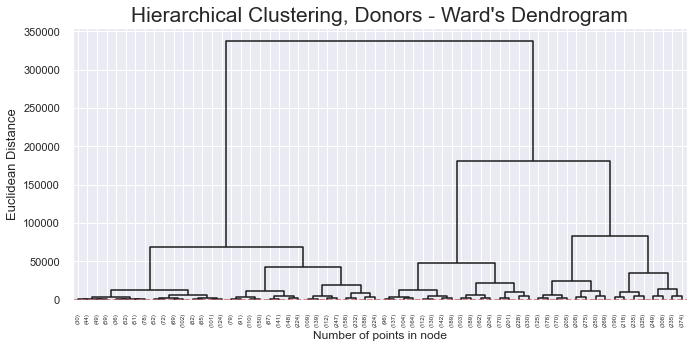

In [167]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Dendrogram plot
sns.set()
fig = plt.figure(figsize=(11,5))
# Tuning the parameters
y_threshold = 28
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering, Donors - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [169]:
hc_d_final= hc4lust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
hc_d_labels= hc_d_final.fit_predict(d_clusterhc)
hc_concat= pd.concat((df,pd.Series(hc_d_labels, name='labels')), axis=1)
hc_concat.groupby('labels').mean()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
labels,,,,,,,,,,,,,,,,,,,,,
0,7763,0.497131,0.498973,0.593649,0.458991,0.418224,0.472124,0.247666,0.113031,0.202279,...,0.521189,0.083243,0.066564,0.077838,0.065946,0.014517,0.080717,0.012510,0.103166,0.053127
1,2763,0.497578,0.498449,0.590071,0.457847,0.419858,0.465532,0.248000,0.114855,0.202667,...,0.522525,0.078865,0.075177,0.088794,0.072340,0.010213,0.084346,0.008794,0.099574,0.047376


# Feature Importance using R2

In [210]:
r2_variables(df_concat[df.columns.to_list() + ['labels']],'labels').drop('labels').sort_values()

Custid         0.000034
Dayswus        0.000101
Complain       0.000132
SMRack         0.003222
Bucket         0.008538
Teenhome       0.009529
Drywh          0.013714
Mailfriend     0.016490
Edu            0.025291
Recency        0.025782
Sweetred       0.034571
Sweetwh        0.037801
Dessert        0.038865
LGRack         0.039902
Emailfriend    0.041459
Access         0.048647
Spcork         0.051882
Dryred         0.066379
Humid          0.071348
Exotic         0.161868
WebVisit       0.312320
LTV            0.383991
Monetary       0.422646
WebPurchase    0.427580
Freq           0.462458
Income         0.515697
Age            0.576282
Perdeal        0.618935
Kidhome        0.794035
dtype: float64

In [321]:
df.reset_index(inplace=True)

In [322]:
#df with some variables only
df1 = df[['Custid','Kidhome','Age','Income','Freq','WebPurchase','LTV','Exotic']]

In [323]:
df1.set_index('Custid',inplace=True)

# K-Means with new variables

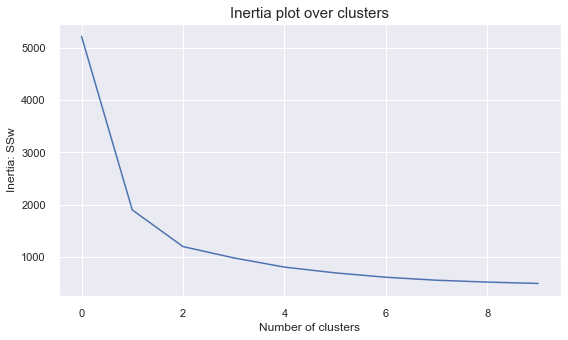

In [324]:
range_clusters = range(1, 11)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(df1)
    inertia.append(kmclust.inertia_)  
    
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [325]:
number_clusters = 2
km2 = KMeans(n_clusters=number_clusters, init='k-means++', n_init=20, random_state=1)
km2_labels = km2.fit_predict(df1)
km2_labels

array([0, 0, 1, ..., 0, 1, 0])

In [326]:
labels= pd.Series(km2_labels, name='labels')
labels

0       0
1       0
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: labels, Length: 10000, dtype: int32

In [327]:
df1.reset_index(inplace=True)
df_concat = pd.concat((df1, labels), axis=1)
df_concat.groupby('labels').mean()

,Custid,Kidhome,Age,Income,Freq,WebPurchase,LTV,Exotic
labels,,,,,,,,
0,6012.779708,0.000516,0.648432,0.560816,0.355106,0.344279,0.265207,0.129190
1,5983.437515,1.000000,0.290860,0.316543,0.098660,0.613285,0.101233,0.232337


In [328]:
df_concat.set_index('Custid',inplace=True)

# Hierarchical Clustering

In [329]:
d_cluster= df1.copy()
d_clusterhc= df1.copy()

In [330]:
hclust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
hc_labels = hclust.fit_predict(d_clusterhc)

In [331]:
df_hc = pd.concat((df, pd.Series(hc_labels, name='labels')), axis=1)
df_hc.groupby('labels').mean()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
labels,,,,,,,,,,,,,,,,,,,,,
0,7731,0.497565,0.499363,0.593382,0.459347,0.418107,0.471632,0.248136,0.113007,0.202725,...,0.521181,0.083652,0.066830,0.078147,0.066830,0.014834,0.081150,0.012693,0.103074,0.053066
1,2731,0.496765,0.497703,0.590509,0.457153,0.420110,0.466339,0.247117,0.114934,0.201833,...,0.522566,0.078012,0.074834,0.088414,0.070789,0.009535,0.083594,0.008379,0.099682,0.047385


In [332]:
# SST
X = d_clusterhc.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [333]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  
    
    sst = get_ss(df)  
    
    r2 = []  
    
    for i in range(min_nclus, max_nclus+1):  
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) 
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        ssb = sst - np.sum(ssw_labels)  
        r2.append(ssb / sst)  
        
    return np.array(r2)

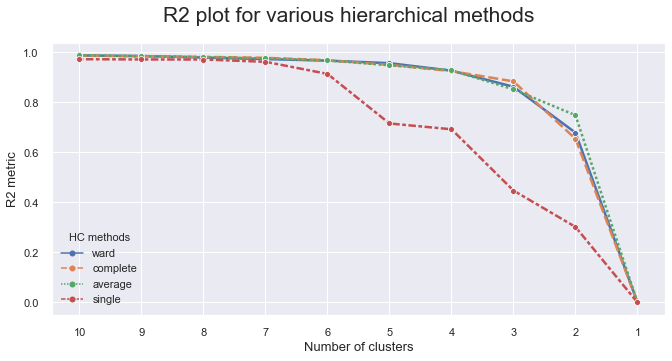

In [334]:
hc_methods = ["ward", "complete", "average", "single"]

max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=d_clusterhc, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [335]:
linkage = 'average'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(d_clusterhc)

array([9681, 7033, 6677, ...,    5,    2,    0], dtype=int64)

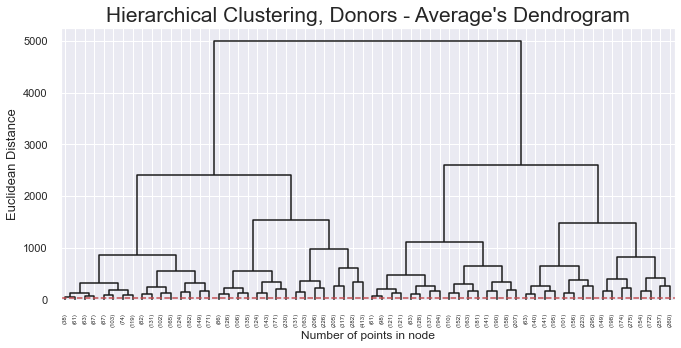

In [336]:
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Dendrogram plot
sns.set()
fig = plt.figure(figsize=(11,5))
# Tuning the parameters
y_threshold = 28
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering, Donors - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [337]:
hc_d_final= hc4lust = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
hc_d_labels= hc_d_final.fit_predict(d_clusterhc)
hc_concat= pd.concat((df,pd.Series(hc_d_labels, name='labels')), axis=1)
hc_concat.groupby('labels').mean()

,Custid,Dayswus,Age,Edu,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,WebVisit,SMRack,LGRack,Humid,Spcork,Bucket,Access,Complain,Mailfriend,Emailfriend
labels,,,,,,,,,,,,,,,,,,,,,
0,7731,0.497565,0.499363,0.593382,0.459347,0.418107,0.471632,0.248136,0.113007,0.202725,...,0.521181,0.083652,0.066830,0.078147,0.066830,0.014834,0.081150,0.012693,0.103074,0.053066
1,2731,0.496765,0.497703,0.590509,0.457153,0.420110,0.466339,0.247117,0.114934,0.201833,...,0.522566,0.078012,0.074834,0.088414,0.070789,0.009535,0.083594,0.008379,0.099682,0.047385


# Cluster Visualization

In [338]:
df1.set_index('Custid',inplace=True)

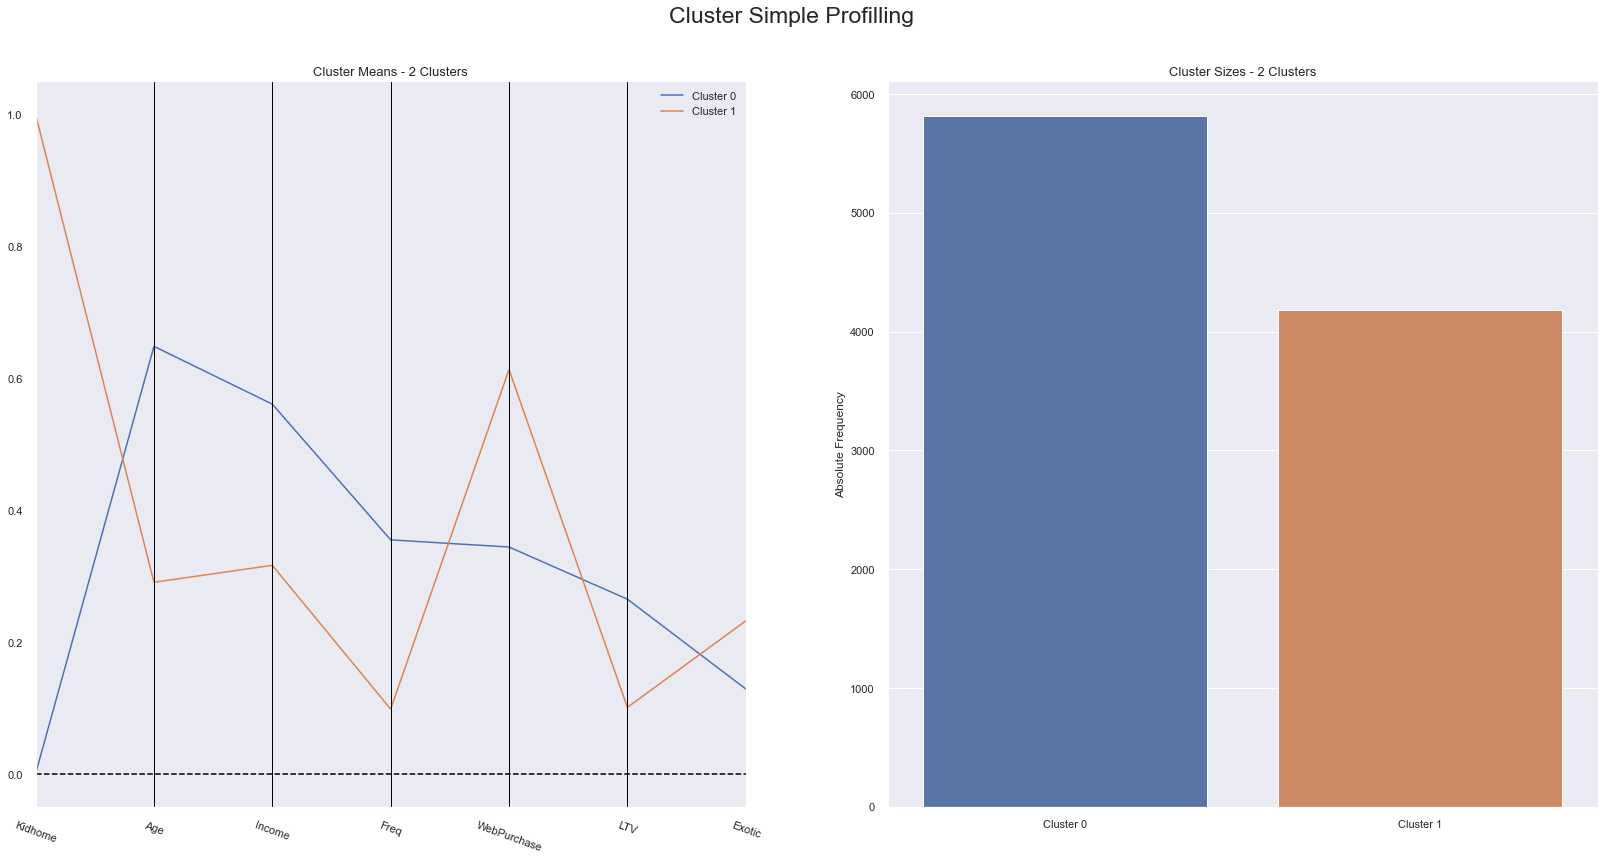

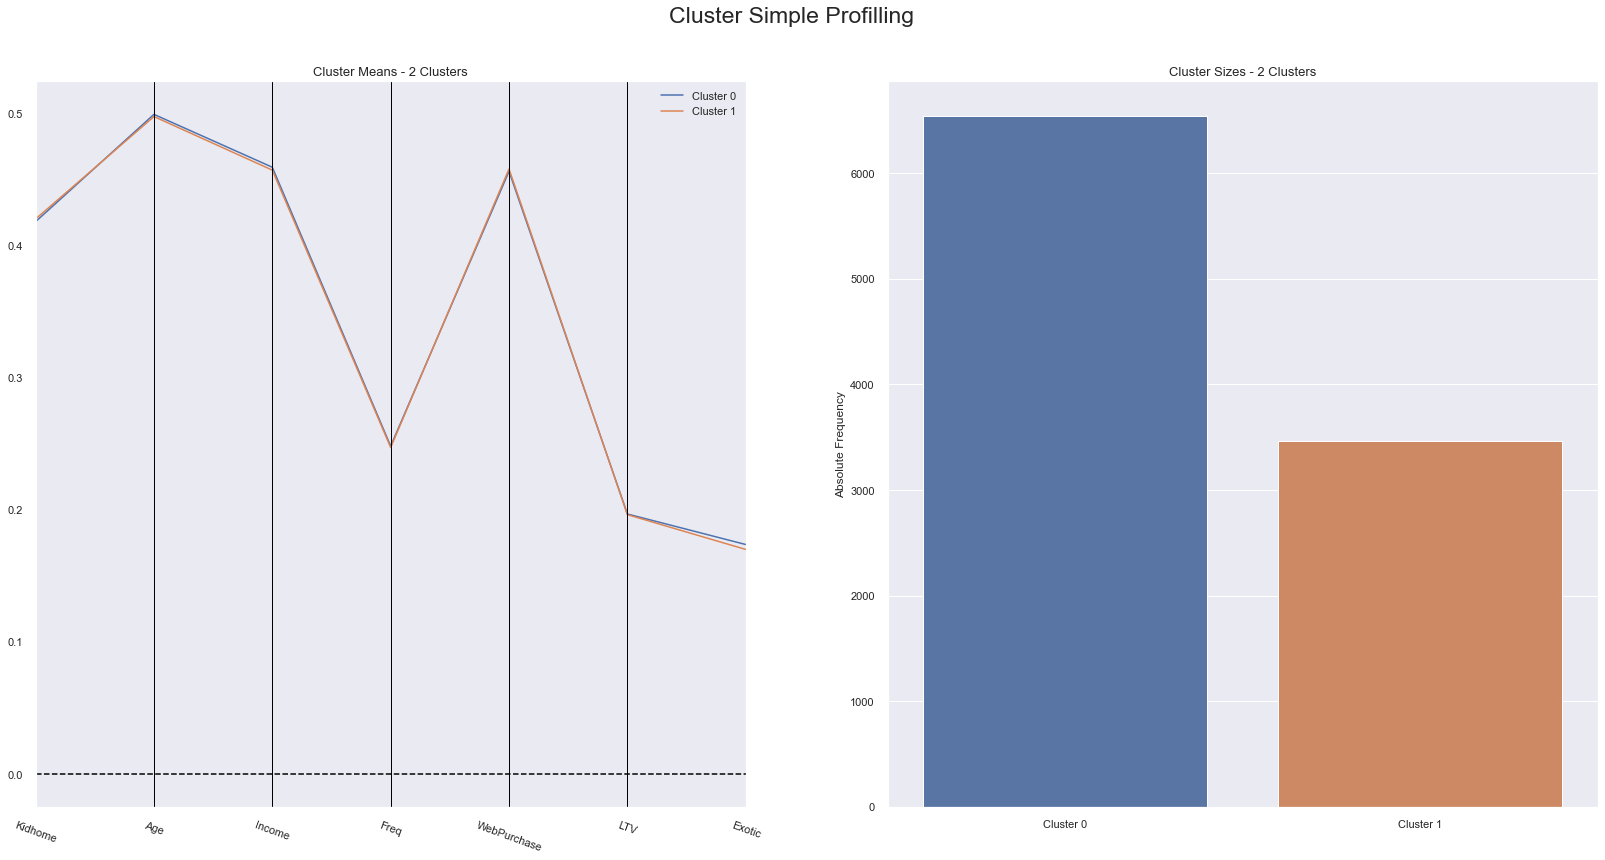

In [340]:
cluster_profiles(
    df = df_concat[df1.columns.to_list() + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)


cluster_profiles(
    df = hc_concat[df1.columns.to_list() + ['labels']], 
    label_columns = ['labels'], 
    figsize = (28, 13)
)


In [297]:
newsne= TSNE(random_state=42).fit_transform(df1)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not         Kidhome     Age  Income    Freq  WebPurchase  Monetary     LTV  Exotic
Custid                                                                        
5325        0.0  0.6167  0.5242  0.3455       0.3810    0.2692  0.3164  0.0104
3956        0.0  0.9500  0.7279  0.6364       0.1905    0.6060  0.3641  0.0000
3681        1.0  0.0000  0.1377  0.0545       0.6667    0.0108  0.0868  0.5000
2829        1.0  0.4000  0.3961  0.0182       0.6548    0.0102  0.0874  0.5729
8788        0.0  0.4833  0.4271  0.0182       0.7024    0.0098  0.0924  0.2917
...         ...     ...     ...     ...          ...       ...     ...     ...
1383        0.0  0.6500  0.5438  0.3273       0.2738    0.2528  0.1854  0.1146
4070        0.0  0.8000  0.5720  0.3091       0.1667    0.2344  0.2890  0.1354
7909        0.0  0.0000  0.2332  0.0364       0.6429    0.0135  0.0929  0.4271
4158        1.0  0.2500  0.3342  0.0000       0.6667    0.0030  0.0914  0.1354
4914        0.0  0.6167  0.6501  0.4364       0.3571    0.3749  0.2392  0.0417

[10000 rows x 8 columns]

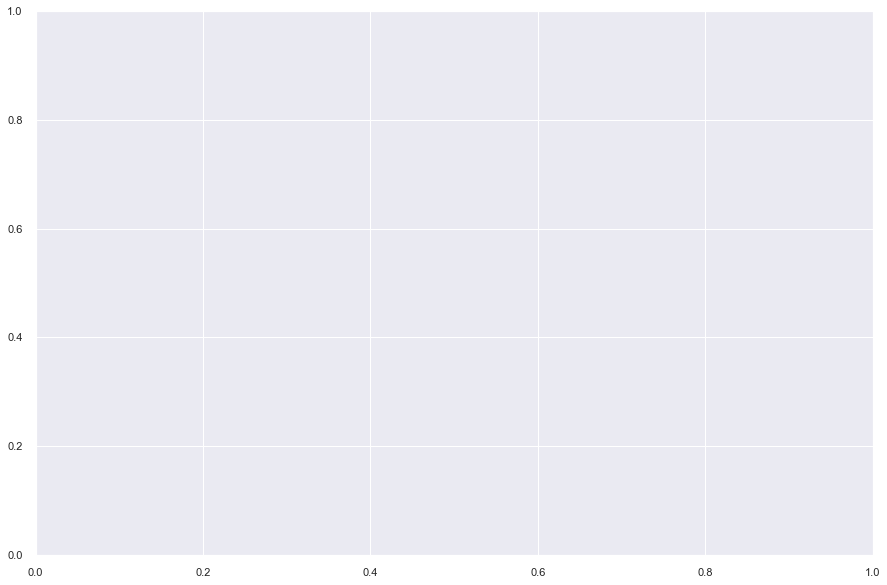

In [304]:
pd.DataFrame(newsne).plot.scatter(x=0, y=1, c=df1, colormap='tab10', figsize=(15,10))
plt.show()